In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from matplotlib.ticker import MultipleLocator

import nn_model.globals
from response_analyzer import ResponseAnalyzer
from results_plotter import ResultsPlotter


In [2]:
train_spikes_dir = f"/home/beinhaud/diplomka/mcs-source/dataset/train_dataset/compressed_spikes/trimmed/size_{nn_model.globals.TIME_STEP}"
test_spikes_dir = f"/home/beinhaud/diplomka/mcs-source/dataset/test_dataset/compressed_spikes/trimmed/size_{nn_model.globals.TIME_STEP}"
# evaluation_tools/evaluation_results/full_evaluation_results/model-10_step-20_lr-3e-05_dnn_separate_residual-True_neuron-layers-5_neuron-size-10_num-hidden-time-steps-1_gradient-clip-10000.0optimizer-type-defaultweight-initialization-default
model_name = "model-10_step-20_lr-1e-05_rnn_separate_residual-True_neuron-layers-9_neuron-size-10_num-hidden-time-steps-1_gradient-clip-10000.0optimizer-type-defaultweight-initialization-default"
responses_dir = f"/home/beinhaud/diplomka/mcs-source/evaluation_tools/evaluation_results/full_evaluation_results/{model_name}/"
dnn_responses_filename = f"/home/beinhaud/diplomka/mcs-source/evaluation_tools/evaluation_results/neuron_model_responses/{model_name}.pth"

neuron_ids_path = "/home/beinhaud/diplomka/mcs-source/evaluation_tools/evaluation_subsets/neurons/model_size_10_subset_10.pkl"
images_ids_path = "/home/beinhaud/diplomka/mcs-source/evaluation_tools/evaluation_subsets/experiments/experiments_subset_10.pkl"

response_analyzer = ResponseAnalyzer(train_spikes_dir, test_spikes_dir, responses_dir, dnn_responses_filename, neuron_ids_path)#, images_ids_path)

  0%|          | 0/76 [00:00<?, ?it/s]/home/beinhaud/miniconda3/envs/neural_simulator/lib/python3.8/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental fe

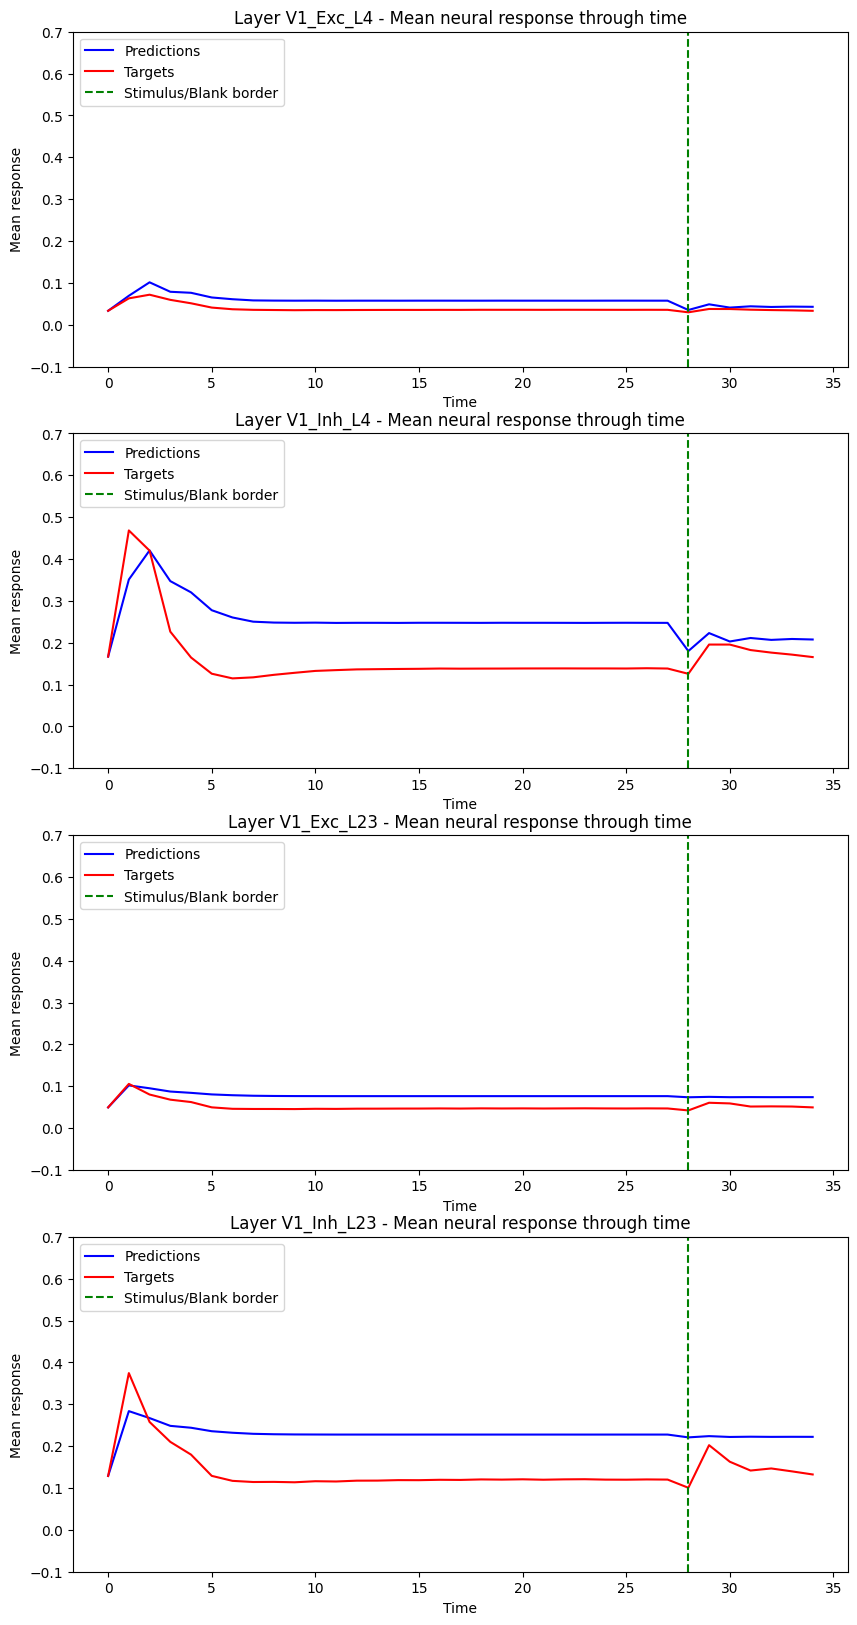

In [3]:
response_analyzer.get_mean_from_evaluated_data()
ResultsPlotter.plot_mean_layer_data(response_analyzer.mean_layer_responses, True, y_range=(-0.1, 0.7), save_fig=True)

IndexError: index 5474 is out of bounds for dimension 1 with size 3750

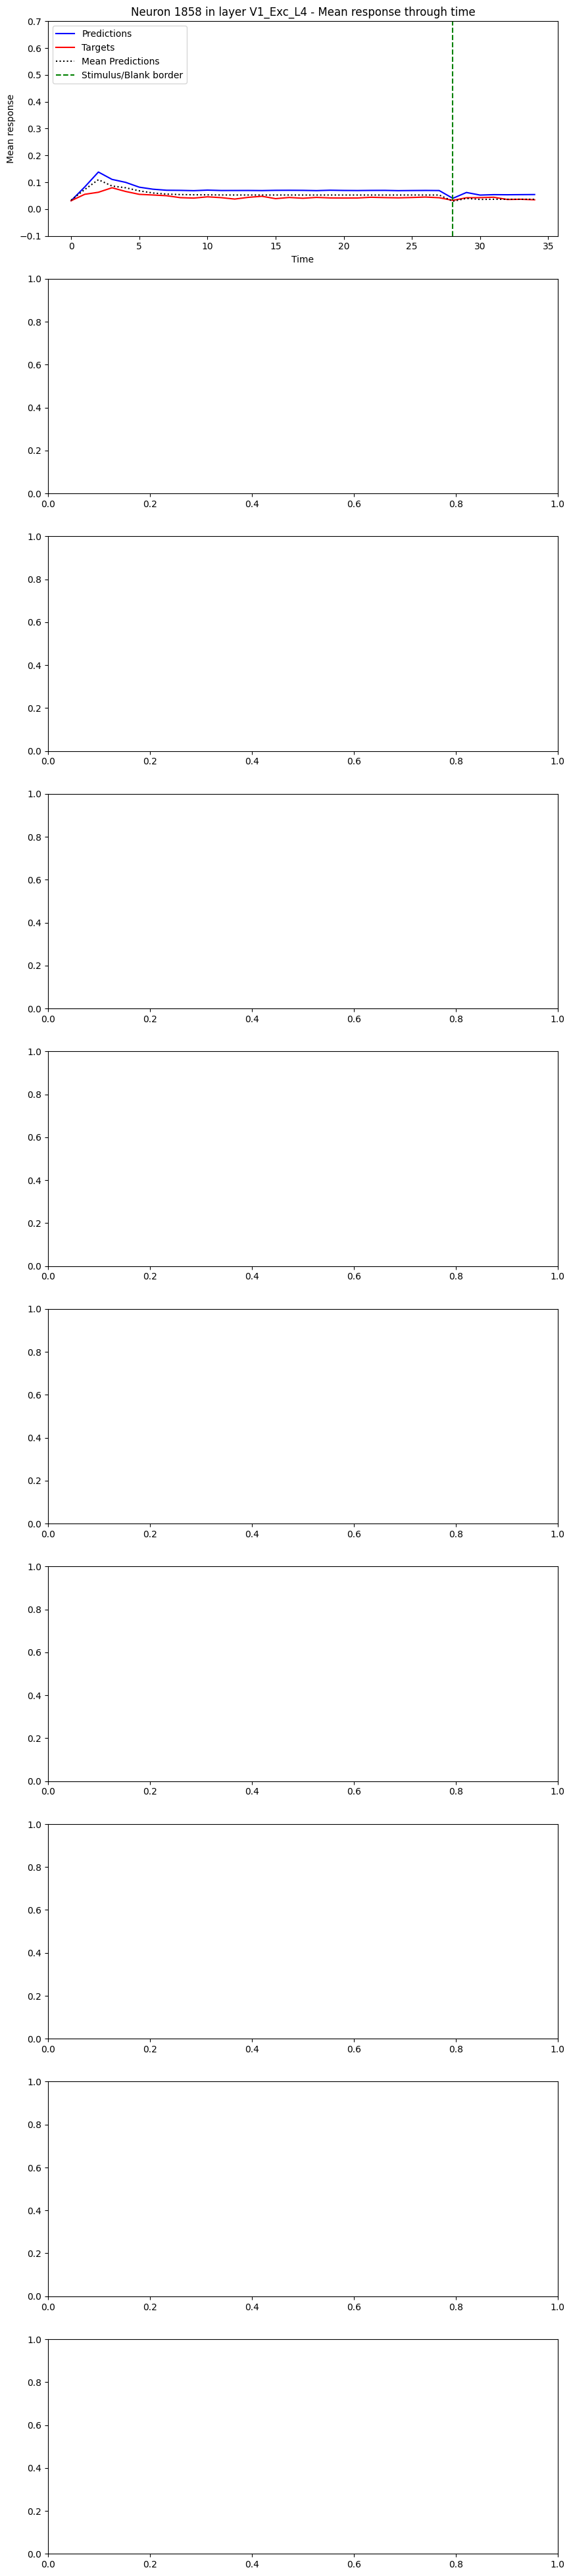

In [4]:
# ResultsPlotter.plot_mean_layer_data({identifier: {layer: layer_data[:, 17] for layer, layer_data in data.items() }  for identifier, data in response_analyzer.mean_neurons_responses.items()}, True, y_range=(-0.1, 0.7), save_fig=True)
ResultsPlotter.plot_mean_neuron_responses(response_analyzer.mean_neurons_responses, response_analyzer.mean_layer_responses, y_range=(-0.1, 0.7), save_fig=True)

In [5]:
# dnn_responses_filename = "/home/beinhaud/diplomka/mcs-source/evaluation_tools/evaluation_results/neuron_model_responses/model-10_step-20_lr-1e-05_complex_residual-True_neuron-layers-5_neuron-size-10_num-hidden-time-steps-1.pth"

# dnn_responses = None
# with open(dnn_responses_filename, "rb") as f:
#     dnn_responses = pickle.load(f)
dnn_responses = response_analyzer.dnn_responses

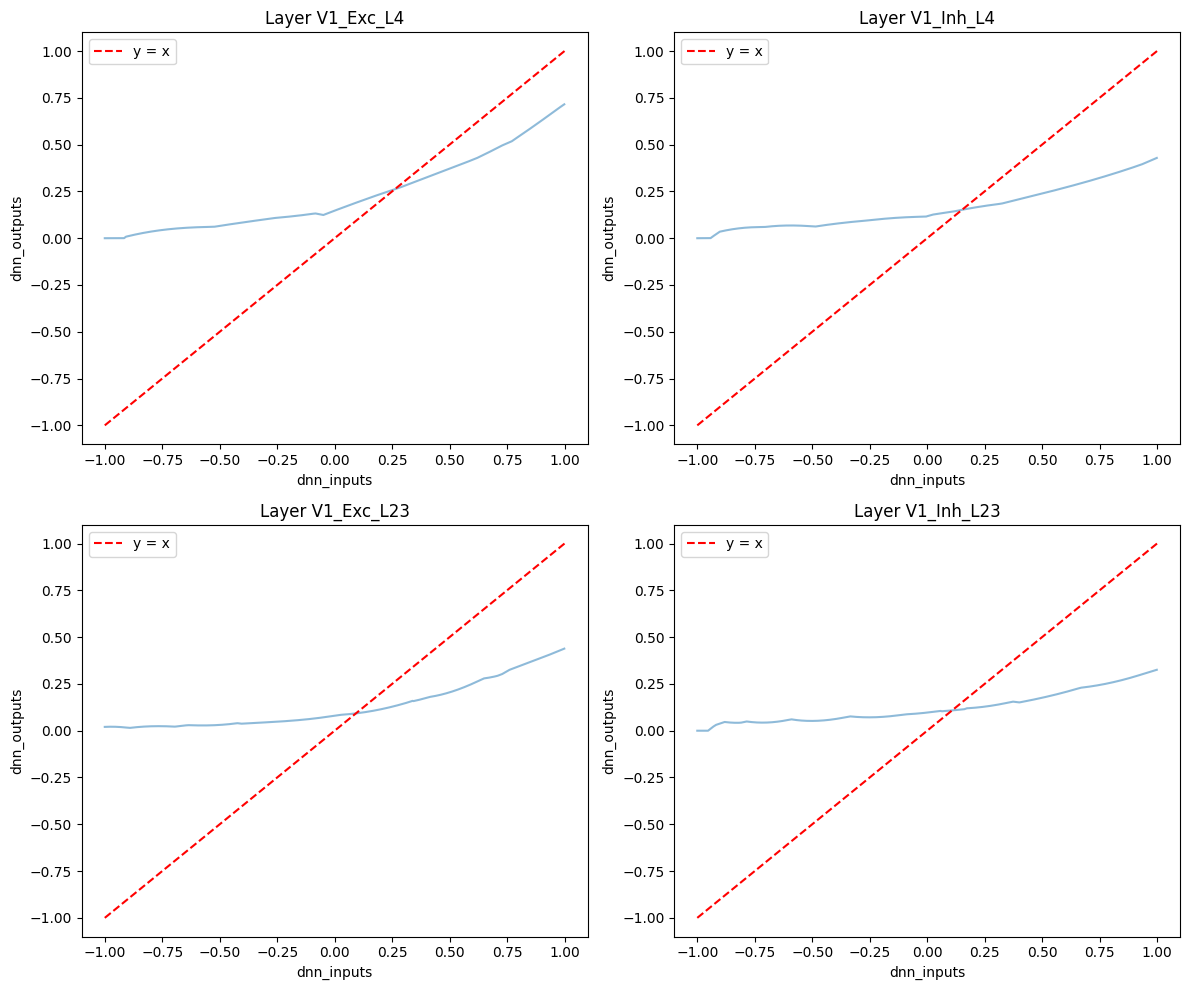

In [6]:
# Plot separate DNN module responses.
ResultsPlotter.plot_dnn_module_responses_separate(dnn_responses, save_fig=True)

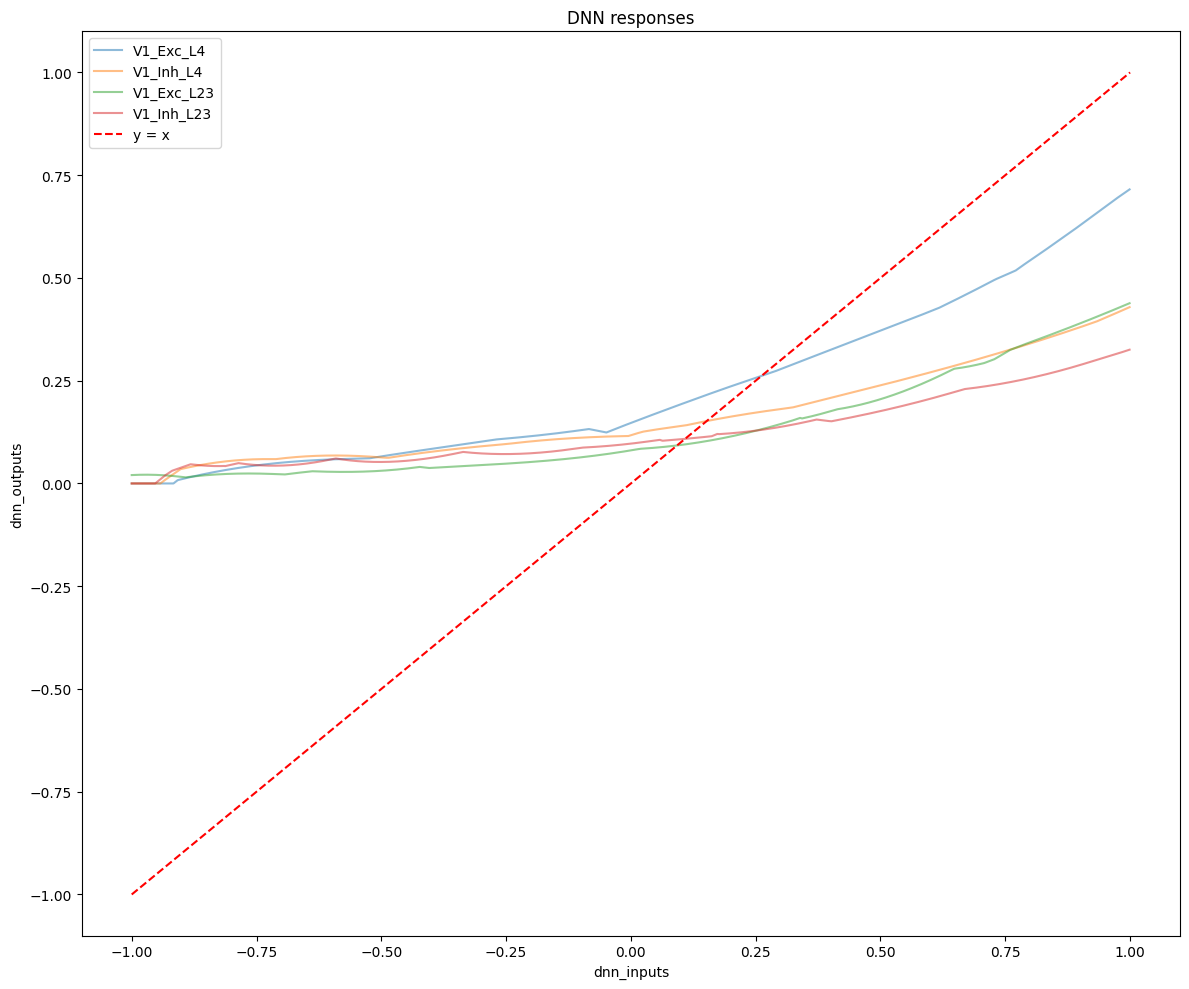

In [7]:
# Plot DNN responses for all layers together.
ResultsPlotter.plot_dnn_module_responses_together(dnn_responses, save_fig=True)

  2%|▏         | 2/90 [00:47<34:37, 23.61s/it]


KeyError: 'X_ON'

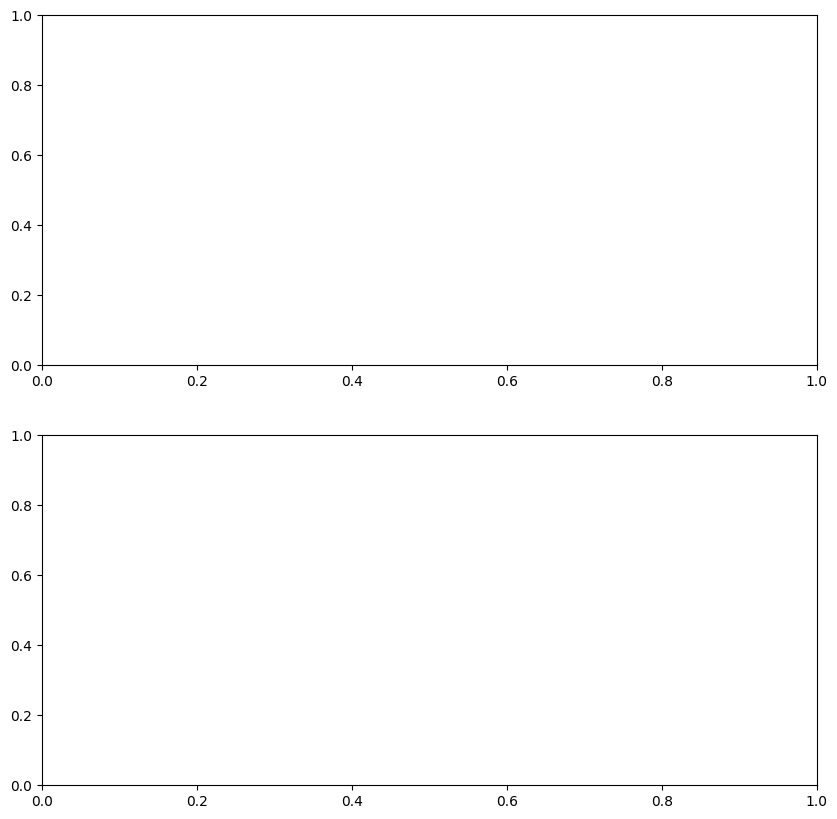

In [8]:
# Plot input data
response_analyzer.get_original_data_mean_over_time(subset=2)
ResultsPlotter.plot_mean_layer_data(response_analyzer.mean_input_layer_responses, include_predictions=False)